Уровень 0:
Создайте матрицу 3 на 3, заполненную числами от 1 до 9
Прибавьте к ней матрицу с единицами на диагонале
Умножьте полученную матрицу на вектор (1, 2, 3)
Посчитайте обратную матрицу к полученной матрице

Уровень 1:
Дан объект в 2d пространстве:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[-100, 100, 1],
[100, 100, 1],
[0, 0, 1],
[100, -100, 1],
[-100, -100, 1]
]
A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

При помощи матричных операций выполните:
Уменьшить объект в два раза.
Повернуть на 130 градусов.
Отразить объект относительно прямой y=x
Выполнить смещение объекта и масштабирование (применить 2 матрицы трансформаций). Смещение на (200, 300) и масштабирование на (0.5, 1,2)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import cv2
import math
from numpy import (array, dot, arccos, clip)
from numpy.linalg import norm
from numpy import linalg as LA

In [6]:
#создать матррицу
m = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
print(m)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [7]:
#прибавить матрицу с диагональю в 1
a = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])
print(a+m)

[[ 2  2  3]
 [ 4  6  6]
 [ 7  8 10]]


In [8]:
#вектор
x=np.array([1,2,3])
v = x*(a+m)
v

array([[ 2,  4,  9],
       [ 4, 12, 18],
       [ 7, 16, 30]])

In [9]:
#linalg.inv(v)
LA.inv(v)

array([[-6.00000000e+00, -2.00000000e+00,  3.00000000e+00],
       [-5.00000000e-01,  2.50000000e-01,  2.22044605e-17],
       [ 1.66666667e+00,  3.33333333e-01, -6.66666667e-01]])

(-200, 200)

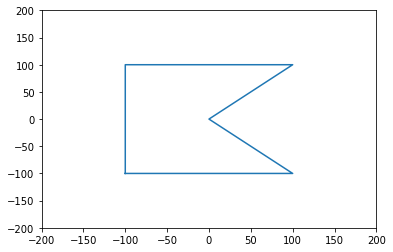

In [10]:
A = [
[-100, -100, 1],
[-100, 100, 1],
[100, 100, 1],
[0, 0, 1],
[100, -100, 1],
[-100, -100, 1]
]
A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

При помощи матричных операций выполните:
Уменьшить объект в два раза.
Повернуть на 130 градусов.
Отразить объект относительно прямой y=x
Выполнить смещение объекта и масштабирование (применить 2 матрицы трансформаций). Смещение на (200, 300) и масштабирование на (0.5, 1,2)

[[-50 -50   0]
 [-50  50   0]
 [ 50  50   0]
 [  0   0   0]
 [ 50 -50   0]
 [-50 -50   0]]


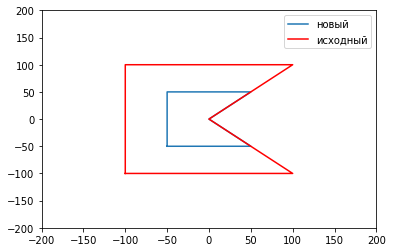

In [11]:
TransformArray = np.array([
    [0.5, 0, 0],
    [0, 0.5, 0],
    [0, 0, 0.5]
])
B = []
for point in A:
  new_point=np.dot(TransformArray,np.transpose(point))
  B.append(new_point)
B = np.array(B).astype(int)
print(B)
x = B[:,0]
y = B[:,1]
plt.plot(x, y)
x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='r')
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.legend(['новый', 'исходный'])

[[  70  122    1]
 [ 122  -70    1]
 [ -70 -122    1]
 [   0    0    1]
 [-122   70    1]
 [  70  122    1]]


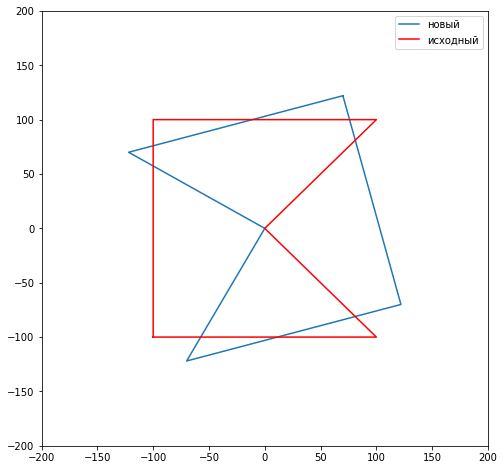

In [12]:
from math import cos, sin, pi

theta = 130 * 180/pi
TransformArray = np.array([
    [cos(theta), sin(theta), 0],
    [-sin(theta), cos(theta), 0],
    [0, 0, 1]
])
B = []
for point in A:
  new_point=np.dot(TransformArray,np.transpose(point))
  B.append(new_point)
B = np.array(B).astype(int)
print(B)
plt.figure(
    figsize=(8, 8),
    )
x = B[:,0]
y = B[:,1]
plt.plot(x, y)
x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='r')
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.legend(['новый', 'исходный'])

(-500, 500)

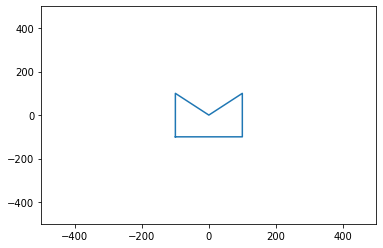

In [13]:
C = A.copy()
C[:, 0],C[:, 1]=C[:, 1].copy(),C[:, 0].copy()
x = C[:,0]
y = C[:,1]
plt.plot(x, y)
plt.ylim([-500, 500])
plt.xlim([-500, 500])

[[100 100   2]
 [100 300   2]
 [200 300   2]
 [150 200   2]
 [200 100   2]
 [100 100   2]]


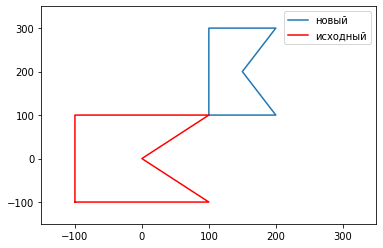

In [30]:
E = A.copy()
#C = np.array(A) + [300,200]
#берем все строки и 0 - означает, что только по x работаем, а 1 - по у - те второй столбец
E[:, 0]+=300
E[:, 1]+=200
x = E[:,0]
y = E[:,1]

TransformArray = np.array([
    [0.5, 0, 0],
    [0, 1, 0],
    [0, 0, 2]
])
D = []
for point in E:
  new_point=np.dot(TransformArray,np.transpose(point))
  D.append(new_point)
D = np.array(D).astype(int)

print(D)

x = D[:,0]
y = D[:,1]

plt.plot(x, y)

x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='r')
plt.ylim([-150, 350])
plt.xlim([-150, 350])
plt.legend(['новый', 'исходный'])